<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week6_HW1_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 개념 정리 & 필사
(Do it! 데이터 분석을 위한 판다스 입문 pg. 243-255, 264-271)

## datetime 오브젝트로 변환하기
### **1. to_datetime** 
* 문자열은 시간 계산을 할 수 없으므로 시간 계산을 하기 위해서는 datetime 오브젝트로 변환해야 한다.
* 판다스의 **`to_datetime`** 메서드를 이용하여 문자열을 datetime 오브젝트로 변환할 수 있다.
* **format** 인자로 **시간 형식 지정자(%d, %m, %y)와 기호(/, -)**를 조합하여 입력하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있다.

> 시간 형식 지정자

* %a(A) : 요일 출력(긴 이름)
* %d : 2자리 날짜 출력
* %b(B), %m : 월 출력(긴 이름)
* %y(Y) : 2자리 년도 출력(4자리)
* %H(l) : 24시간 출력(12시간), %M : 분 출력, %S : 초 출력

In [2]:
import pandas as pd
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/data/country_timeseries.csv')
ebola.head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN


In [3]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [4]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [ ]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')

test_df1

,order_day,date_dt1,date_dt2,date_dt3
0,01/01/15,2015-01-01,2015-01-01,2015-01-01
1,02/01/15,2015-01-02,2015-01-02,2015-01-02
2,03/01/15,2015-01-03,2015-01-03,2015-01-03


In [ ]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})

test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

test_df2

,order_day,date_dt
0,01-01-15,2015-01-01
1,02-01-15,2015-01-02
2,03-01-15,2015-01-03


## datetime 오브젝트로 변환하기
### **2. read_csv**
* 데이터 집합을 불러올 때, datetime 오브젝트로 변환하려는 열을 지정하여 변환한다.
* read_csv() 메서드의 **`parse_dates`** 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 입력한다.

In [5]:
ebola1 = pd.read_csv('/content/drive/MyDrive/ESAA/data/country_timeseries.csv', parse_dates=['Date'])
ebola.head(3)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03


In [6]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## datetime 오브젝트에서 날짜 정보 추출하기
### 1. dt 접근자 사용 X
* 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환하고, 원하는 행의 인덱스를 이용하여 year, month, day 속성을 이용하여 년, 월, 일 정보를 추출할 수 있다.

### 2. dt 접근자 사용
* datetime 오브젝트에 **dt 접근자**를 사용하여 datetime 열에 접근하고, **year, quarter, month, day** 속성을 이용하여 년, 분기, 월, 일 값을 추출할 수 있다.
* dt 접근자의 year, month, day 속성으로 추출한 칼럼의 데이터 타입은 **정수형**이다.

In [8]:
# dt 접근자 사용 X
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
d1

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]

In [9]:
# 년도 추출
print(d1[0].year)

# 월 추출
print(d1[1].month)

# 일 추출
print(d1[2].day)

2018
5
18


In [10]:
# dt 접근자 사용
# 년도 추출
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date']) # Date 열을 datetime 오브젝트로 변환한 date_dt 열 생성
ebola['year'] = ebola['date_dt'].dt.year

ebola[ ['Date', 'date_dt', 'year'] ].head(3)

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015


In [29]:
# 월 추출, 일 추출
ebola['month'] = ebola['date_dt'].dt.month
ebola['day'] = ebola['date_dt'].dt.day

ebola[ ['Date', 'date_dt', 'year', 'month', 'day'] ].head(3)

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3


In [17]:
# date_dt는 datetime형, year, month, day는 정수형
ebola.dtypes

Date                           object
Day                             int64
Cases_Guinea                  float64
Cases_Liberia                 float64
Cases_SierraLeone             float64
Cases_Nigeria                 float64
Cases_Senegal                 float64
Cases_UnitedStates            float64
Cases_Spain                   float64
Cases_Mali                    float64
Deaths_Guinea                 float64
Deaths_Liberia                float64
Deaths_SierraLeone            float64
Deaths_Nigeria                float64
Deaths_Senegal                float64
Deaths_UnitedStates           float64
Deaths_Spain                  float64
Deaths_Mali                   float64
date_dt                datetime64[ns]
year                            int64
month                           int64
day                             int64
dtype: object

## 사례별 시계열 데이터 계산하기
### 1. 에볼라 최초 발병일 계산하기
* ebola 데이터프레임의 마지막 행과 열을 살펴보면 데이터가 시간 역순으로 정렬되어 있다.
* datetime 오브젝트에 **`min()` 메서드**를 사용하여 가장 작은 날짜, 즉 에볼라의 최초 발병일을 찾을 수 있다.
* 'Date'열에서 에볼라 최초 발병일을 빼면 최초 발병일로부터 에볼라의 진행 정도를 알 수 있다.

In [21]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


In [19]:
# 에볼라 최초 발병일
ebola['date_dt'].min()

Timestamp('2014-03-22 00:00:00')

In [22]:
# 에볼라의 진행 정도
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

ebola[ ['Date','outbreak_d'] ].head()

,Date,outbreak_d
0,1/5/2015,289 days
1,1/4/2015,288 days
2,1/3/2015,287 days
3,1/2/2015,286 days
4,12/31/2014,284 days


## 사례별 시계열 데이터 계산하기
### 2. 파산한 은행의 개수 계산하기
* 분기별로 파산한 은행이 얼마나 되는지 계산한다.
* banks 데이터프레임의 'Closing Date', 'Updated Date' 열이 시계열 데이터다.
* 'Closing Date', 'Updated Date' 열은 문자형 데이터이므로 **`read_csv()` 메서드의 parse_dates** 속성을 이용하여 두 열을 datetime 오브젝트로 변환하여 불러온다.
* **dt 접근자와 year, quarter** 속성을 이용하여 은행이 파산한 연도와 분기를 새로운 열로 추가한다.
* **`groupby()` 메서드**를 사용하여 연도별로 파산한 은행의 개수를 구할 수 있다. 개수를 구하기 위해서 **`size()`**를 이용한다.

In [23]:
banks = pd.read_csv('/content/drive/MyDrive/ESAA/data/banklist.csv')
banks.head(3)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17


In [24]:
# 'Closing Date', 'Updated Date' 열은 문자형
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [25]:
banks = pd.read_csv('/content/drive/MyDrive/ESAA/data/banklist.csv', parse_dates=[5,6]) # 5번째, 6번째 칼럼을 datetime 오브젝트로 변환
banks.head(3)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26


In [26]:
# 'Closing Date', 'Updated Date' 열은 datetime형
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [28]:
# 은행이 파산한 연도와 분기를 추출
banks['closing_year'] = banks['Closing Date'].dt.year
banks['closing_quarter'] =  banks['Closing Date'].dt.quarter

banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_year,closing_quarter
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,2017,4
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,2017,4
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2017,2
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2017,2
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2017,2


In [30]:
# 연도별로 파산한 은행의 개수
closing_year = banks.groupby(['closing_year']).size() #size() 메서드를 이용하여 개수를 추출
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

In [32]:
# 각 연도별, 분기별로 파산한 은행의 개수
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size() 
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

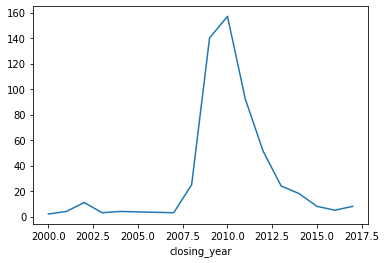

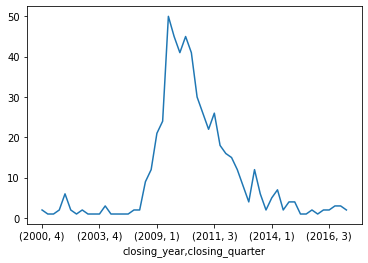

In [44]:
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

## 시간 범위 수정하고 데이터 밀어내기 - **shift 메서드**
### 나라별로 에볼라의 확산 속도 비교
* 나라별로 에볼라 발병일이 다르므로 그래프를 그리면 그래프가 그려지기 시작하는 시점이 다르다.
* 에볼라의 확산 속도를 제대로 비교하기 위해서는 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 한다.
* 중간에 데이터가 없는 날짜에도 데이터를 포함시켜야 확산 속도를 제대로 비교할 수 있다.
* **`pd.date_range()`**를 이용하여 'Date'열의 최솟값과 최댓값으로 시간 범위를 생성하여 데이터가 아예 없었던 날짜까지 포함한 인덱스를 생성할 수 있다.
* **`reindex`** 메서드를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정한다.

In [87]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA/data/country_timeseries.csv', parse_dates=['Date'])
ebola.index = ebola['Date']

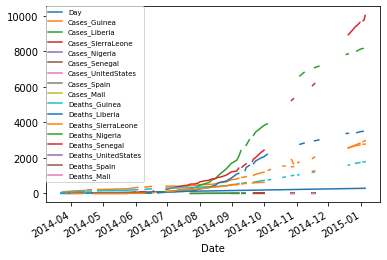

<Figure size 720x576 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig = plt.figure(figsize=(10,8))
ax = ebola.iloc[0:, 1: ].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [59]:
ebola_sub = ebola[ ['Day','Cases_Guinea','Cases_Liberia'] ]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


In [70]:
# 최솟값부터 최댓값까지의 인덱스 생성
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [71]:
# 데이터프레임과 날짜를 맞추기 위해 new_idx의 인덱스를 반대로 뒤집음
new_idx = reversed(new_idx)

In [72]:
# 인덱스를 새로 지정
ebola = ebola.reindex(new_idx)
ebola.head().iloc[:,:5]
# 원래 자료가 없었던 값은 NaN

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN


## 시간 범위 수정하고 데이터 밀어내기 - **shift 메서드**
### 나라별로 에볼라의 확산 속도 비교
* **last_valid_index, first_valid_index** 메서드를 이용하여 유효한 값이 있는 인덱스를 추출한다.
* **`last_valid_index()`**는 가장 오래된 데이터의 인덱스를 가져온다.
* **`first_valid_index()`**는 가장 최근의 데이터의 인덱스를 가져온다.
* 에볼라가 가장 처음 발병한 날과 각 나라의 에볼라 발병일의 차이를 구한다.
* **`shift`** 메서드를 이용하여 모든 열의 값을 앞서 구한 차이만큼 옮긴다.
* shift 메서드는 인자로 입력한 값만큼 데이터를 밀어내는 메서드이다.

In [89]:
# 각 칼럼의 가장 오래된 데이터의 인덱스 추출
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [90]:
# 각 칼럼의 가장 최근 데이터의 인덱스 추출
first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

In [91]:
# 에볼라가 가장 처음 발병한 날
earliest_date = ebola.index.min() 
earliest_date

Timestamp('2014-03-22 00:00:00')

In [92]:
# 에볼라가 가장 처음 발병한 날과 각 나라의 에볼라 발병일의 차이
shift_values = last_valid - earliest_date
shift_values

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [80]:
shift_values[11].days

5

In [93]:
ebola_dict = {} # 비어있는 딕셔너리 생성
for idx, col in enumerate(ebola): # ebola의 index와 각 col를 각 변수로 전달
    d = shift_values[idx].days # shift_values에서 날짜만을 추출
    shifted = ebola[col].shift(d) # ebola의 열을 추출한 날짜만큼 shift -> 모든 열에 반복
    ebola_dict[col] = shifted

# 딕셔너리를 데이터프레임으로 변환
ebola_shift = pd.DataFrame(ebola_dict) 
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-27,2014-03-27,5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,2014-03-26,4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-25,2014-03-25,3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0,49.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [94]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
5,103.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,66.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN
4,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,62.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
3,86.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,60.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
2,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0,49.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


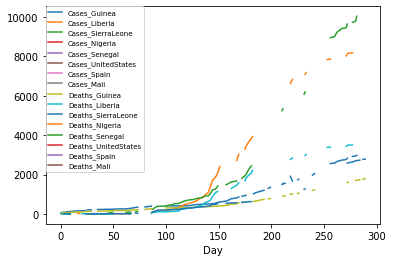

In [95]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()